In [309]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle



In [310]:
inputs_train = pd.read_csv("../../data/cleaned/unemp_inputs_train_det.csv")

labels_train = pd.read_csv("../../data/cleaned/unemp_labels_train_det.csv")
# labels_train = labels_train.drop(columns=["id"], axis=1)

inputs_test = pd.read_csv("../../data/cleaned/unemp_inputs_test_det.csv")

labels_test = pd.read_csv("../../data/cleaned/unemp_labels_test_det.csv")
# labels_test = labels_test.drop(columns=["id"], axis=1)

In [311]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(inputs_train, labels_train)

LinearRegression()

In [312]:
mins = pd.read_csv("../../data/cleaned/mins.csv")
maxes = pd.read_csv("../../data/cleaned/maxes.csv")
min_unemployment_rate = mins.unemployment_rate[0]
max_unemployment_rate = maxes.unemployment_rate[0]

def inverting_transform_unemployment_point(score):
    return score * (max_unemployment_rate - min_unemployment_rate) + min_unemployment_rate

In [313]:
pred = linreg.predict(inputs_test)

mse = metrics.mean_squared_error(pred, labels_test)
print("MSE: " + str(mse))
print("actual score: " + str(labels_test.iloc[12][0]))
print("predicted score: " + str(pred[12][0]))
print("actual unemployment: " + str(inverting_transform_unemployment_point(labels_test.iloc[12][0])))
print("predicted unemployment: " + str(inverting_transform_unemployment_point(pred[12][0])))

pickle.dump(str(mse), open("../../data/predictions/reg_mse.txt", "wb"))


MSE: 0.3629091323830829
actual score: 0.504424778761062
predicted score: 0.5278383490893841
actual unemployment: 9.1
predicted unemployment: 9.36457334471004


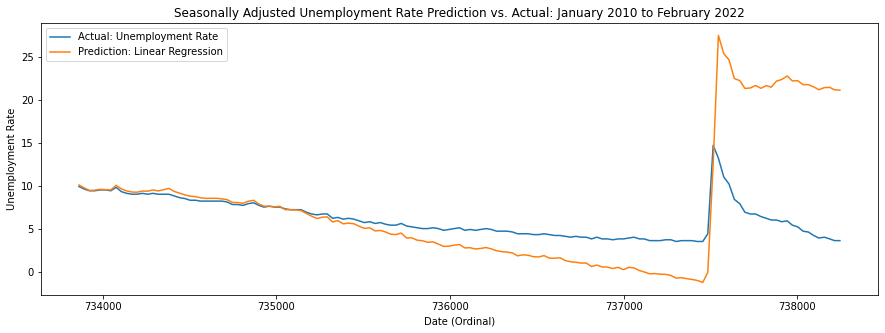

In [314]:
mins = pd.read_csv("../../data/cleaned/mins.csv")
maxes = pd.read_csv("../../data/cleaned/maxes.csv")
min_unemployment_rate = mins.unemployment_rate[0]
max_unemployment_rate = maxes.unemployment_rate[0]

def inverting_transform_unemployment(series):
    series = series * (max_unemployment_rate - min_unemployment_rate) + min_unemployment_rate
    return series

y_pred_reg_E = inverting_transform_unemployment(pred)
y_inv = inverting_transform_unemployment(labels_test.values.reshape(labels_test.shape[0], 1))

months_df = pd.read_csv("../../data/cleaned/unemp_inputs_test_det.csv").date
plt.figure(figsize=(15, 5))
plt.plot(months_df, y_inv, label='Actual: Unemployment Rate')
plt.plot(months_df, y_pred_reg_E[:145], label='Prediction: Linear Regression')
plt.ylabel('Unemployment Rate')
plt.xlabel('Date (Ordinal)')
plt.title('Seasonally Adjusted Unemployment Rate Prediction vs. Actual: January 2010 to February 2022')
plt.legend()
plt.savefig('../../figures/reg_prediction_vs_actual.jpg')
plt.show()

In [315]:
from sklearn.neural_network import MLPRegressor

predictor = MLPRegressor()
predictor.fit(inputs_train, labels_train)

c:\Users\philb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()

In [316]:
pred = predictor.predict(inputs_test)
mse = metrics.mean_squared_error(pred, labels_test)

In [317]:
print("MSE: " + str(mse))
print("actual score: " + str(labels_test.iloc[12][0]))
print("predicted score: " + str(pred[12]))
print("actual unemployment: " + str(inverting_transform_unemployment_point(labels_test.iloc[12][0])))
print("predicted unemployment: " + str(inverting_transform_unemployment_point(pred[12])))

pickle.dump(str(mse), open("../../data/predictions/mlp_mse.txt", "wb"))

MSE: 0.35331519438854275
actual score: 0.504424778761062
predicted score: -0.11581233505445754
actual unemployment: 9.1
predicted unemployment: 2.09132061388463


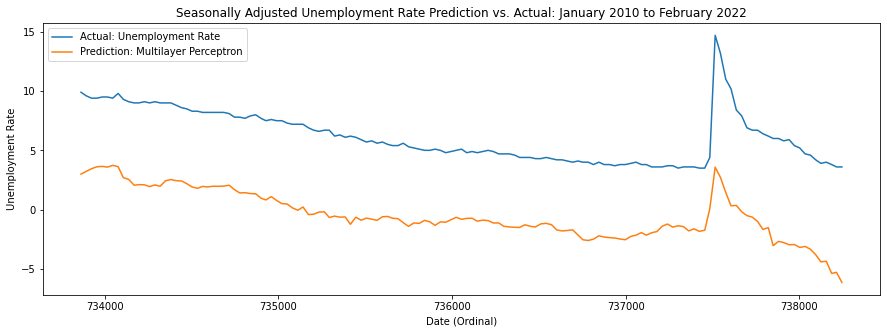

In [318]:
y_pred_mlp_E = inverting_transform_unemployment(pred)
y_inv = inverting_transform_unemployment(labels_test.values.reshape(labels_test.shape[0], 1))

plt.figure(figsize=(15, 5))
plt.plot(months_df, y_inv, label='Actual: Unemployment Rate')
plt.plot(months_df, y_pred_mlp_E[:145], label='Prediction: Multilayer Perceptron')
plt.ylabel('Unemployment Rate')
plt.xlabel('Date (Ordinal)')
plt.title('Seasonally Adjusted Unemployment Rate Prediction vs. Actual: January 2010 to February 2022')
plt.legend()
plt.savefig('../../figures/mlp_prediction_vs_actual.jpg')
plt.show()

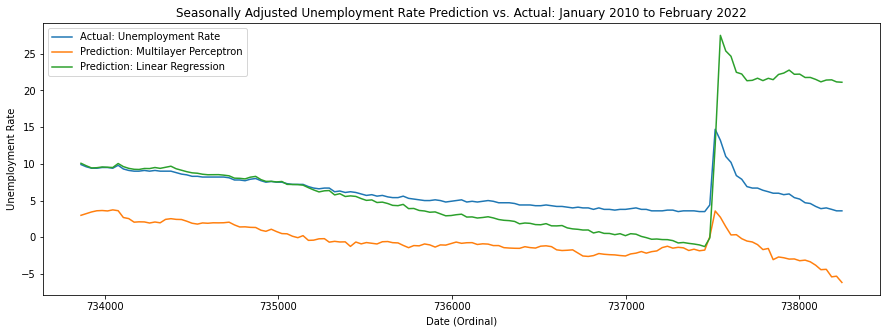

In [319]:
plt.figure(figsize=(15, 5))
plt.plot(months_df, y_inv, label='Actual: Unemployment Rate')
plt.plot(months_df, y_pred_mlp_E[:145], label='Prediction: Multilayer Perceptron')
plt.plot(months_df, y_pred_reg_E[:145], label='Prediction: Linear Regression')
plt.ylabel('Unemployment Rate')
plt.xlabel('Date (Ordinal)')
plt.title('Seasonally Adjusted Unemployment Rate Prediction vs. Actual: January 2010 to February 2022')
plt.legend()
plt.savefig('../../figures/mlpreg_prediction_vs_actual.jpg')
plt.show()

In [320]:
pd.DataFrame(y_pred_mlp_E).to_csv("../../data/predictions/mlp_predictions.csv", index=False)
pd.DataFrame(y_pred_reg_E).to_csv("../../data/predictions/reg_predictions.csv", index=False)